# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use supervised learning linear regression modeling to predict hazard mitigation success.**

**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a linear regression to see if there is a pattern overtime in hazard mitigation.
- Make a linear regression to see if there is a pattern overtime in recovery funds.
- Somehow bring these two together to see if certain hazard mitigation had more ROI
- Make categoricals for years

# Data Exploration and Cleaning

In [107]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [108]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [109]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects.csv")
df.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,numberOfProperties,numberOfFinalProperties,status,subgrantee,costSharePercentage,projectAmount,federalShareObligated,programFy,dateInitiallyApproved,dateApproved,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,6,48,Texas,167.000,Galveston,HMGP,DR-1999-0061-R,"400.1: Utility Protective Measures (Electric, ...",UTMB Elevation of Electrical Services Bldg 9,GALVESTON,0,0,Closed,UNIVERSITY OF TEXAS MEDICAL BRANCH,0.750,402910.000,302181.820,2011,2013-12-10T05:00:00.000Z,2020-02-06T05:00:00.000Z,2020-02-06T05:00:00.000Z,0.000,Statewide,1999.000,4.041,2969310.000,0.000,a959dc8cb69df0bd7f236b2021101501,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd79
1,5,18,Indiana,21.000,Clay,HMGP,DR-1997-0014-R,200.1: Acquisition of Private Real Property (S...,City of Brazil Phase 2,CLAY,13,6,Closed,Brazil,0.620,366071.000,227383.000,2011,2013-04-09T04:00:00.000Z,2019-11-25T05:00:00.000Z,2019-11-25T05:00:00.000Z,0.000,Statewide,1997.000,1.357,961452.000,0.000,cb8464b16e232b502ef9c8a3d385752b,2020-09-17T18:15:38.771Z,5f63a7ca31a8c6681c9dfd81
2,7,19,Iowa,153.000,Polk,HMGP,DR-1998-0022-P,91.1: Local Multihazard Mitigation Plan,Polk Countywide Multi-Jurisdiction Multi-Hazar...,POLK,0,0,Closed,Polk (County),0.750,96965.000,72724.000,2011,2012-05-10T04:00:00.000Z,2015-07-28T04:00:00.000Z,2015-07-29T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,bd467ece18ecc6c8a40b824175b7f029,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd84
3,2,36,New York,83.000,Rensselaer,HMGP,DR-4020-0064-F,600.1: Warning Systems (as a Component of a Pl...,Canal Flood Warning System,OSWEGO; ONTARIO; SARATOGA; SCHENECTADY; SCHOHA...,0,0,Closed,THRUWY AUTH/NYS CANAL CORP,1.000,5932500.000,5932500.000,2011,2013-11-12T05:00:00.000Z,2014-11-07T05:00:00.000Z,2018-01-24T05:00:00.000Z,0.000,Statewide,4020.000,0.000,0.000,0.000,ab6774d20b7cd64215ded6135377cc1e,2021-01-19T17:38:38.392Z,5f63a7ca31a8c6681c9dfd87
4,7,19,Iowa,141.000,O'Brien,HMGP,DR-1998-0013-F,600.1: Warning Systems (as a Component of a Pl...,Sheldon Outdoor Warning Sirens Project,O'BRIEN,0,0,Closed,Sheldon,0.750,34245.000,25683.000,2011,2012-05-03T04:00:00.000Z,2012-05-03T04:00:00.000Z,2013-09-26T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,62fff845e7929eb2587b530b69ae2f93,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd88


In [110]:
# Subgrantee consider keeping as it (Subgrantee add  university column etc.)
# Leave costSharePercentage

In [111]:
# How big is this dataset?
df.shape

(29628, 30)

In [112]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [113]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'granteeTribalIndicator', 'dateInitiallyApproved', 'dateApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 'id', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 7 columns):
region              29628 non-null int64
stateNumberCode     29628 non-null int64
programArea         29628 non-null object
projectAmount       29608 non-null float64
programFy           29628 non-null int64
benefitCostRatio    29628 non-null float64
netValueBenefits    24707 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ MB


In [114]:
#df['countyCode'].fillna(0.0, axis = 0, inplace=True)
#df['countyCode'].value_counts()

In [115]:
#df['countyCode'] = df['countyCode'].astype('int64')

In [116]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,benefitCostRatio,netValueBenefits
count,29628.000,29628.000,29608.000,29628.000,29628.000,24707.000
mean,5.170,27.841,815798.371,2006.716,171.556,9907805.571
std,2.420,17.182,8021291.971,7.576,20368.674,808951961.855
min,1.000,1.000,-1624776.000,1989.000,0.000,0.000
25%,4.000,12.000,37054.750,2001.000,0.000,0.000
50%,5.000,27.000,114895.500,2008.000,0.848,103985.000
75%,7.000,40.000,419440.250,2013.000,1.666,950061.000
max,10.000,78.000,729000000.000,2020.000,2479069.620,89843962103.000


In [128]:
# Bining the benefitCostRatio to be if above 1 or below 1 
df['Positive_ROI']=df['benefitCostRatio']>=1

In [131]:
df['Positive_ROI'].value_counts()

False    14989
True     14639
Name: Positive_ROI, dtype: int64

In [ ]:
# Using this as a target
# Using logistic regression to directly answer what returns a pos ROI

In [ ]:
# Forcast demand with a times series possibly


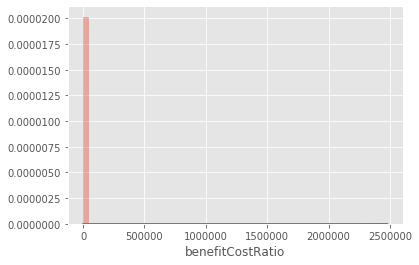

In [126]:
sns.distplot(df['benefitCostRatio'])

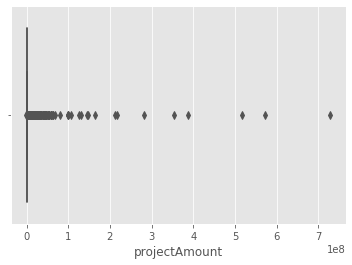

In [117]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [118]:
df['projectAmount'].sum()

24154158163.54

In [119]:
df['projectAmount'].median()

114895.5

In [120]:
# Do we have nulls?
df.isna().sum()

region                 0
stateNumberCode        0
programArea            0
projectAmount         20
programFy              0
benefitCostRatio       0
netValueBenefits    4921
dtype: int64

In [121]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

In [122]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [123]:
df[(df['projectAmount']<0)]

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits
3795,5,27,HMGP,-1624776.000,1997,0.000,0.000
6134,1,25,HMGP,-110696.000,1991,0.000,0.000
22833,5,26,HMGP,-36500.000,1998,0.000,0.000


In [16]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

## Questions we can answer without linear regression

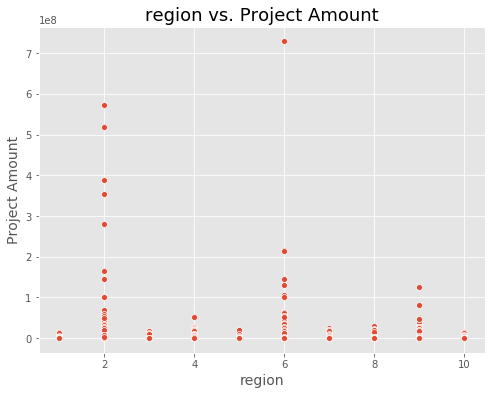

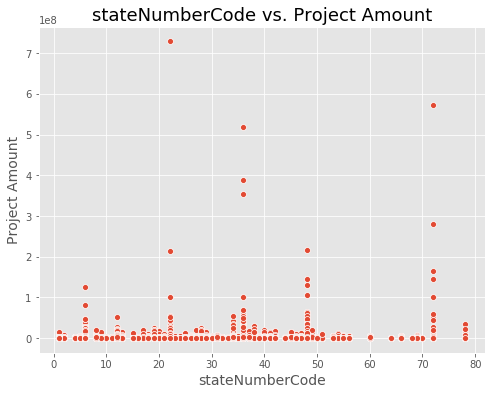

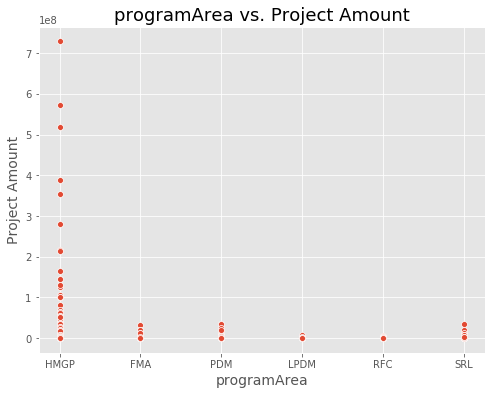

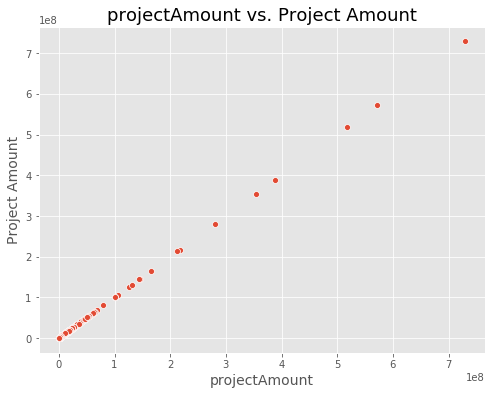

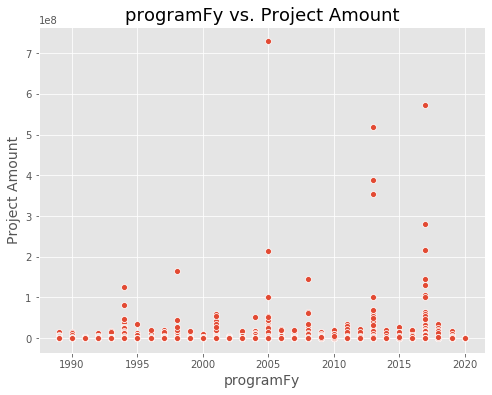

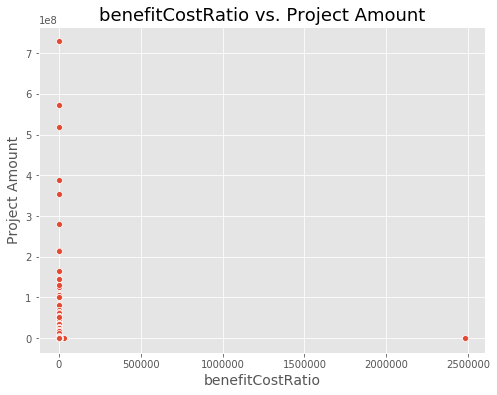

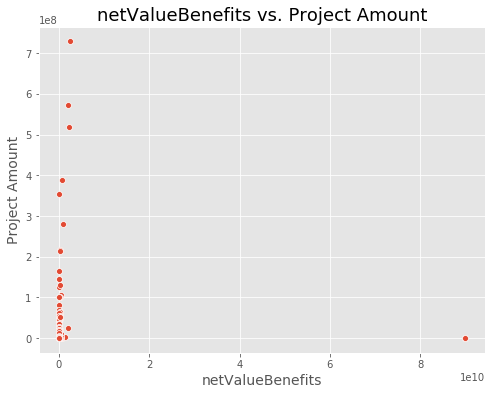

In [17]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [18]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [19]:
categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# Outlier Removal

In [20]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [21]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [22]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(df, num_cols)

0 outliers found in region
0 outliers found in stateNumberCode
3833 outliers found in projectAmount
0 outliers found in programFy
2806 outliers found in benefitCostRatio
4561 outliers found in netValueBenefits


In [23]:
df2.head()

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits,region_outliers,stateNumberCode_outliers,projectAmount_outliers,programFy_outliers,benefitCostRatio_outliers,netValueBenefits_outliers
0,6,48,HMGP,402910.000,2011,4.041,2969310.000,False,False,False,False,False,True
1,5,18,HMGP,366071.000,2011,1.357,961452.000,False,False,False,False,False,False
2,7,19,HMGP,96965.000,2011,0.000,0.000,False,False,False,False,False,False
3,2,36,HMGP,5932500.000,2011,0.000,0.000,False,False,True,False,False,False
4,7,19,HMGP,34245.000,2011,0.000,0.000,False,False,False,False,False,False


In [24]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers']

In [25]:
df2.shape

(29576, 13)

In [26]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
#df2= df2.drop(columns=['region_outliers', 'stateNumberCode_outliers', 'programFy_outliers'])

In [27]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers']

In [28]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(22597, 13)

In [29]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 1 to 29627
Data columns (total 7 columns):
region              22597 non-null int64
stateNumberCode     22597 non-null int64
programArea         22597 non-null object
projectAmount       22597 non-null float64
programFy           22597 non-null int64
benefitCostRatio    22597 non-null float64
netValueBenefits    22597 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ MB


In [31]:
df=df2

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 1 to 29627
Data columns (total 7 columns):
region              22597 non-null int64
stateNumberCode     22597 non-null int64
programArea         22597 non-null object
projectAmount       22597 non-null float64
programFy           22597 non-null int64
benefitCostRatio    22597 non-null float64
netValueBenefits    22597 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ MB


In [33]:
# Do we have nulls?
df.isna().sum()

region              0
stateNumberCode     0
programArea         0
projectAmount       0
programFy           0
benefitCostRatio    0
netValueBenefits    0
dtype: int64

In [34]:
df.region.value_counts()

4     6224
6     2857
5     2146
7     1819
1     1766
9     1736
3     1690
8     1607
2     1605
10    1147
Name: region, dtype: int64

In [35]:
df.stateNumberCode.value_counts()

12    1664
1     1270
6     1268
40     951
19     801
13     798
48     794
36     683
28     660
22     648
34     605
21     598
46     573
37     570
42     509
55     470
39     447
27     440
53     436
51     433
38     418
50     413
31     390
25     384
26     353
20     338
45     336
23     328
47     328
5      326
33     310
24     302
41     302
54     292
29     290
72     256
17     249
30     237
2      211
9      207
8      203
16     198
18     187
35     138
4      137
44     124
10     115
49     104
15      87
32      81
56      72
78      61
69      61
11      39
64      33
66      33
60      24
70       7
68       5
Name: stateNumberCode, dtype: int64

In [36]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    16746
PDM      3249
FMA      2156
LPDM      200
SRL       169
RFC        77
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Project Amount')

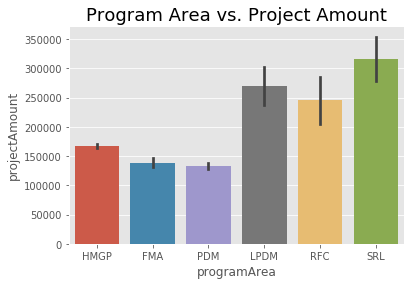

In [37]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

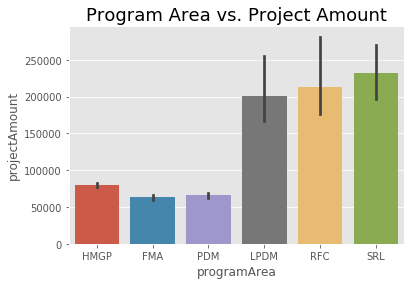

In [38]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

In [39]:
#df.projectIdentifier.value_counts()

In [40]:
df.projectAmount.value_counts()

40000.000     185
50000.000     178
100000.000    129
25000.000     118
20000.000     117
             ... 
10929.000       1
120956.000      1
13955.000       1
10999.990       1
114272.000      1
Name: projectAmount, Length: 17734, dtype: int64

In [41]:
df.programFy.value_counts()

2011    1739
2005    1330
2017    1260
2008    1143
1998    1104
2013    1042
2007    1008
2010     973
2009     959
2004     864
2001     851
2003     805
2016     794
2014     780
1997     739
2002     723
2015     716
2018     703
1996     694
1994     628
2000     533
1999     518
2019     512
2012     512
2006     437
1993     278
1995     278
1992     246
1990     167
1991     153
1989      97
2020      11
Name: programFy, dtype: int64

In [42]:
df = df[(df['projectAmount']>1998)]

In [43]:
df.benefitCostRatio.value_counts()

0.000    13798
1.000      925
1.371      318
1.020       31
1.010       28
         ...  
3.064        1
3.270        1
2.762        1
1.870        1
2.904        1
Name: benefitCostRatio, Length: 2353, dtype: int64

In [44]:
df.netValueBenefits.value_counts()

0.000          13795
21420.000        315
1.000            140
276000.000        87
175000.000        35
               ...  
1037085.000        1
19097.000          1
223454.000         1
420245.000         1
151475.000         1
Name: netValueBenefits, Length: 7252, dtype: int64

In [45]:
# drop rows with nan in yearbuilt column
#df.dropna(axis=0, how='any', inplace=True, subset=['grantee'])
#df.isna().sum()

The following columns will be dropped because they are not relevant:
- id
- lastRefresh
- hash
- subgranteeTribalIndicator
- granteeTribalIndicator       
- 



The following columns will be dropped because they are redundant with another column:
- dateInitiallyApproved        
- dateApproved                  
- dateClosed                   

In [46]:
#df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
  #                       'granteeTribalIndicator', 'dateInitiallyApproved', 'dateApproved', 
 #                        'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', ''], 
  #      inplace=True)

#df.info()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22356 entries, 1 to 29627
Data columns (total 7 columns):
region              22356 non-null int64
stateNumberCode     22356 non-null int64
programArea         22356 non-null object
projectAmount       22356 non-null float64
programFy           22356 non-null int64
benefitCostRatio    22356 non-null float64
netValueBenefits    22356 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ MB


In [48]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 17523
programFy 32
benefitCostRatio 2353
netValueBenefits 7252


In [49]:
df['region'] = df['region'].astype('category') 
df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
df['programFy'] = df['programFy'].astype('category')

In [50]:
pd.get_dummies(df)

,projectAmount,benefitCostRatio,netValueBenefits,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,stateNumberCode_29,stateNumberCode_30,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
1,366071.000,1.357,961452.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,96965.000,0.000,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,34245.000,0.000,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,25609.000,0.000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,109900.000,0.990,108817.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,356900.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29620,25000.000,0.000,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29622,8720.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29626,21000.000,0.000,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


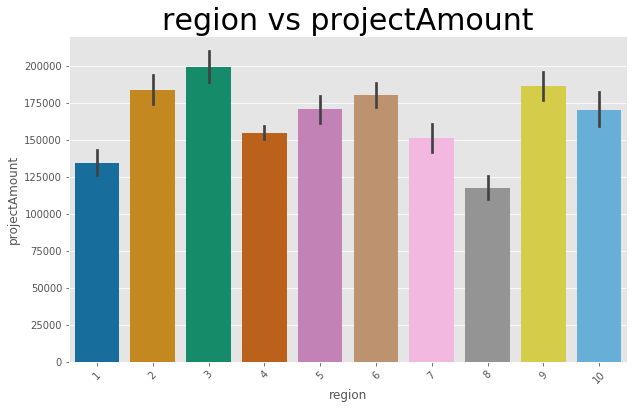

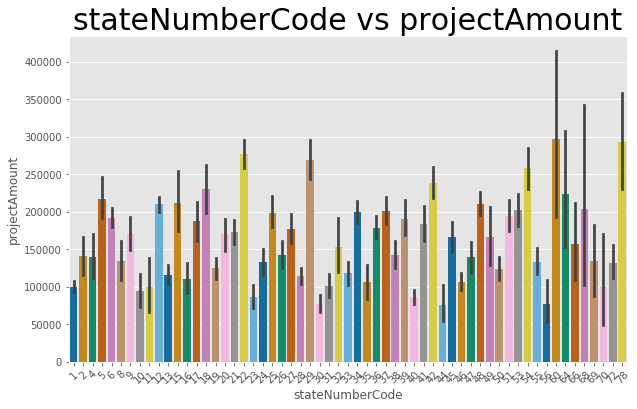

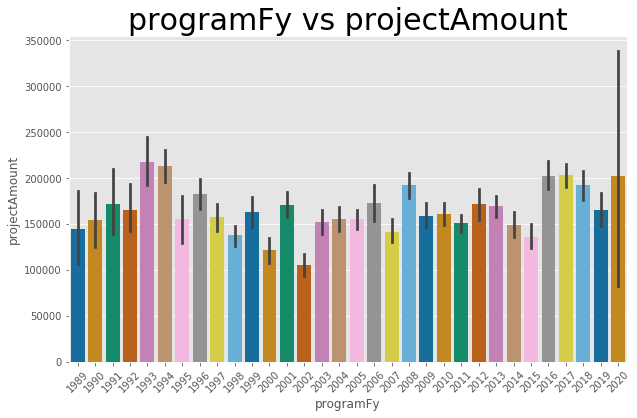

In [51]:
categorical_plots(df)

# Model #1

In [52]:
#Split features and target
X = df.drop(columns=['projectAmount'], axis=1)
y = df['projectAmount']

#Create function to easily build models and display results
def build_model(classifier, predictors, labels):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    #Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Create variables that can be called outside function
    build_model.X_train = X_train
    build_model.X_test = X_test
    build_model.y_train = y_train
    build_model.y_test = y_test
    
    #Fit model
    model = classifier.fit(X_train, y_train)
    score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))

    #Create predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    #Create variables that can be called outside function
    build_model.y_hat_train = y_hat_train
    build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
                             round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0])
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1])
    plt.subplots_adjust(wspace=0.4)
    return model    

In [53]:
features = '+'.join(df.drop('projectAmount', axis = 1).columns)
formula = 'projectAmount ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     157.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:10:19   Log-Likelihood:            -2.9895e+05
No. Observations:               22356   AIC:                         5.981e+05
Df Residuals:                   22259   BIC:                         5.989e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.666e+04   1.55e+04      5.603      0.000    5.63e+04    1.17e+05
region[T.2]            4.691e+04   4915.756      9.543      0.000    3.73e+04    5.65e+04
region[T.3]            1.084e+04   4871.056      2.225      0.026    1291.828    2.04e+04
region[T.4]           -1.347e+04   5041.016     -2.672      0.008   -2.34e+04   -3588.613
region[T.5]            2.028e+04   3532.151      5.742      0.000    1.34e+04    2.72e+04
region[T.6]            1.147e+04   3613.122      3.175      0.002    4389.773    1.86e+04
region[T.7]           -1562.4061   3657.206     -0.427      0.669   -8730.788    5605.976
region[T.8]           -1.751e+04   4497.594     -3.893      0.000   -2.63e+04   -8692.572
region[T.9]            2.265e+04   9724.545      2.330      0.020    3593.776    4.17e+04
region[T.10]           4594.3358   4091.671      1.123      0.262   -3425.628    1.26e+04
stateNumberCode[T.2]  -4224.6058   9195.779     -0.459      0.646   -2.22e+04    1.38e+04
stateNumberCode[T.4]  -2.907e+04   1.58e+04     -1.838      0.066   -6.01e+04    1938.242
stateNumberCode[T.5]   9205.8644   7796.628      1.181      0.238   -6076.076    2.45e+04
stateNumberCode[T.6]    155.7009   1.11e+04      0.014      0.989   -2.16e+04    2.19e+04
stateNumberCode[T.8]   1.491e+04   1.03e+04      1.445      0.149   -5316.755    3.51e+04
stateNumberCode[T.9]   2.391e+04   1.04e+04      2.305      0.021    3575.827    4.42e+04
stateNumberCode[T.10] -3.832e+04   1.33e+04     -2.874      0.004   -6.45e+04   -1.22e+04
stateNumberCode[T.11] -3.505e+04   2.17e+04     -1.619      0.106   -7.75e+04    7389.501
stateNumberCode[T.12]  5.693e+04   6321.124      9.006      0.000    4.45e+04    6.93e+04
stateNumberCode[T.13] -1.661e+04   7489.544     -2.217      0.027   -3.13e+04   -1927.976
stateNumberCode[T.15]  3.035e+04   1.83e+04      1.655      0.098   -5600.738    6.63e+04
stateNumberCode[T.16] -2.436e+04   9442.320     -2.580      0.010   -4.29e+04   -5849.996
stateNumberCode[T.17] -7394.9809   8959.290     -0.825      0.409    -2.5e+04    1.02e+04
stateNumberCode[T.18]  6.843e+04   1.02e+04      6.726      0.000    4.85e+04    8.84e+04
stateNumberCode[T.19] -2.821e+04   5459.139     -5.168      0.000   -3.89e+04   -1.75e+04
stateNumberCode[T.20] -1172.7780   7412.545     -0.158      0.874   -1.57e+04    1.34e+04
stateNumberCode[T.21]   3.73e+04   8141.319      4.581      0.000    2.13e+04    5.33e+04
stateNumberCode[T.22]   5.03e+04   6231.556      8.072      0.000    3.81e+04    6.25e+04
stateNumberCode[T.23] -5338.8499   8639.591     -0.618      0.537   -2.23e+04    1.16e+04
stateNumberCode[T.24] -3450.9449   9038.958     -0.382      0.703   -2.12e+04    1.43e+04
stateNumberCode[T.25]  2.606e+04   7773.667      3.352      0.001    1.08e+04    4.13e+04
stateNumberCode[T.26] -

In [54]:
model1.params

Intercept            86663.129
region[T.2]          46912.256
region[T.3]          10839.442
region[T.4]         -13469.359
region[T.5]          20282.984
                       ...    
programFy[T.2018]    45236.134
programFy[T.2019]    38827.129
programFy[T.2020]    88822.296
benefitCostRatio    -61680.449
netValueBenefits         0.472
Length: 106, dtype: float64

<Figure size 864x432 with 0 Axes>

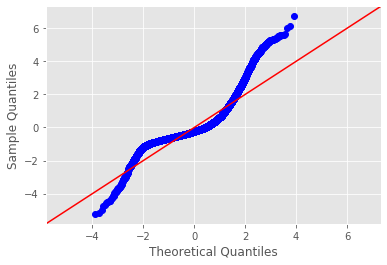

In [55]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

In [56]:
# Coment on qq plot
# R-squared .4


In [57]:
# Now we can look again at programAmount to see if there are still extremes
df['projectAmount'].head()

1    366071.000
2     96965.000
4     34245.000
9     25609.000
10   109900.000
Name: projectAmount, dtype: float64

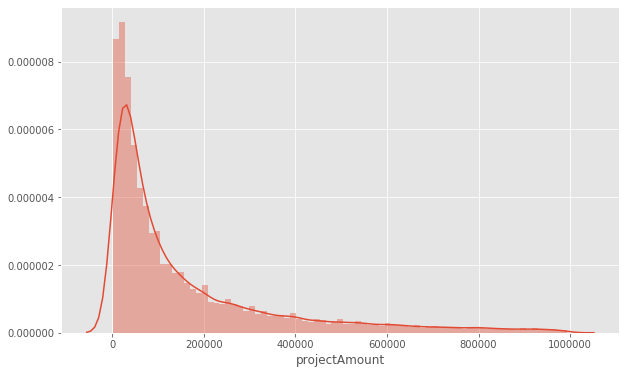

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['projectAmount'], bins='auto')

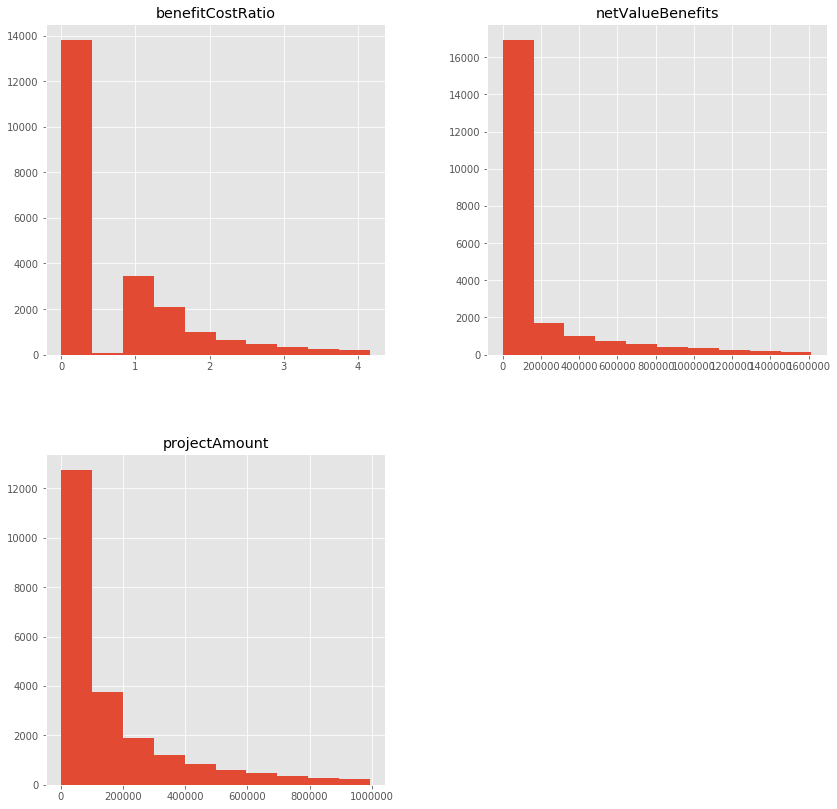

In [59]:
df.hist(figsize = (14,14));

programArea


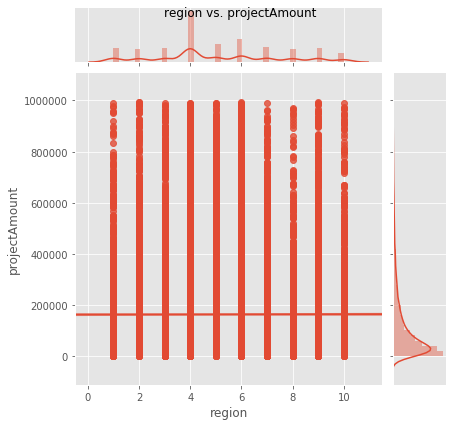

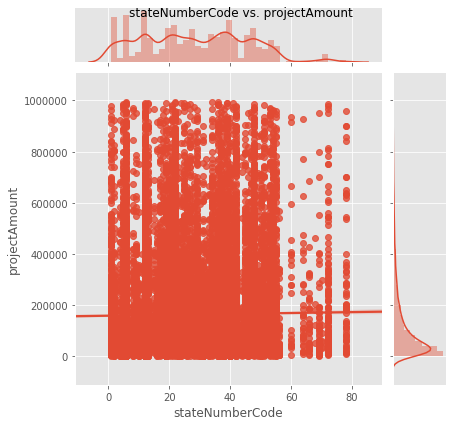

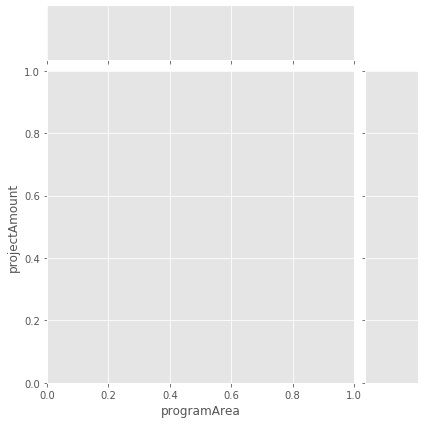

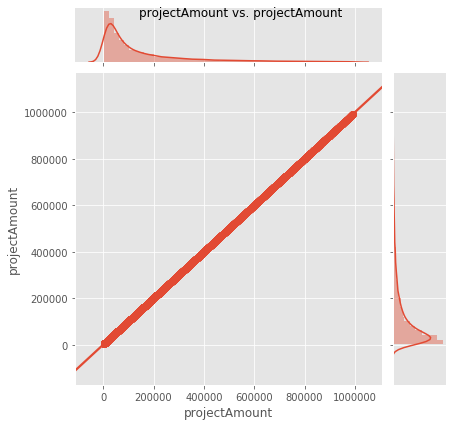

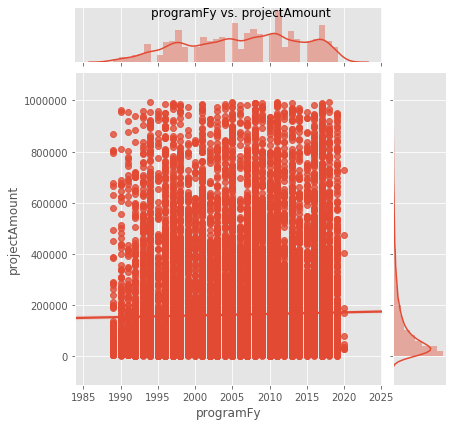

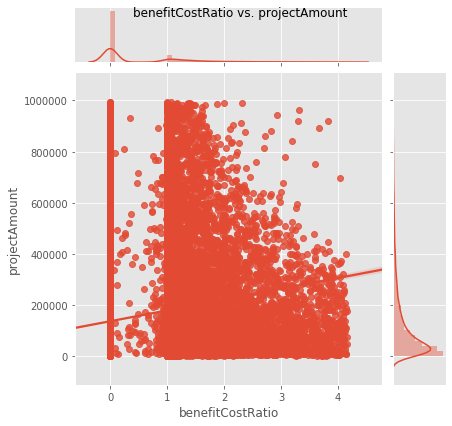

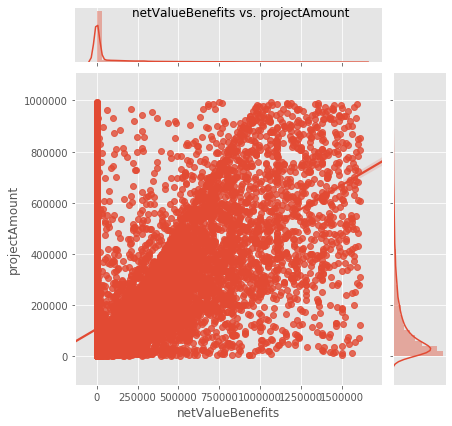

In [60]:
# Creating a function that will create a joint plot to vizualize linearity against our target price
def jointplot(df, col, target = 'projectAmount'):
    g = sns.jointplot(data = df, x = col, y = target, kind = 'reg')
    plt.suptitle(f"{col} vs. {target}");
    return g

for col in df.columns:
    try:
        jointplot(df, col)
    except: 
        print(col)

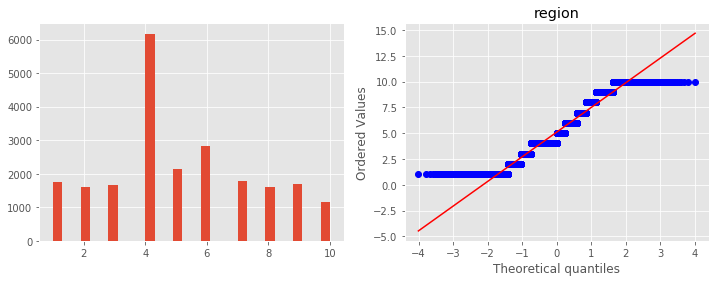

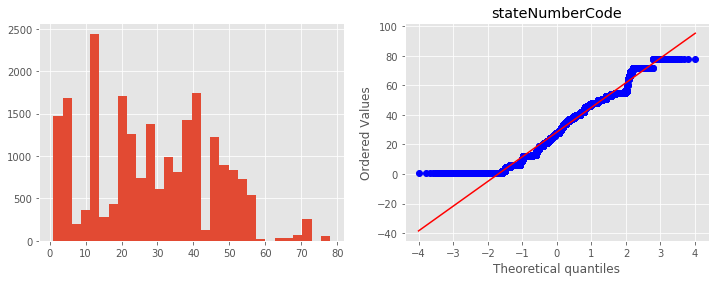

programArea


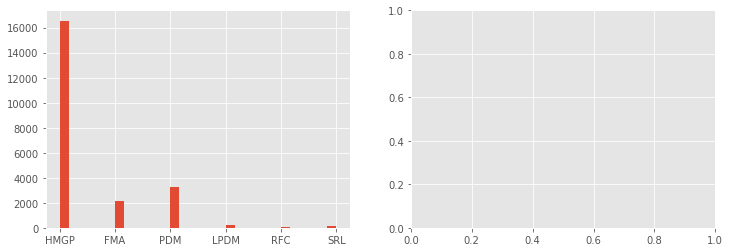

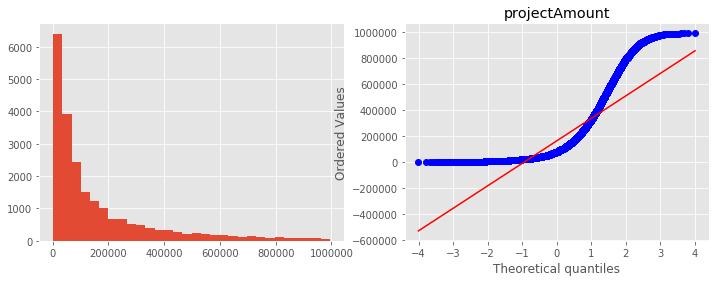

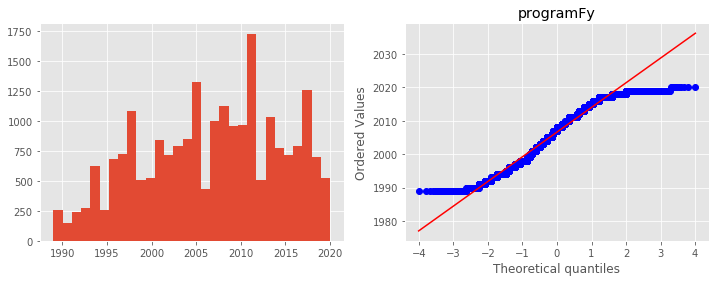

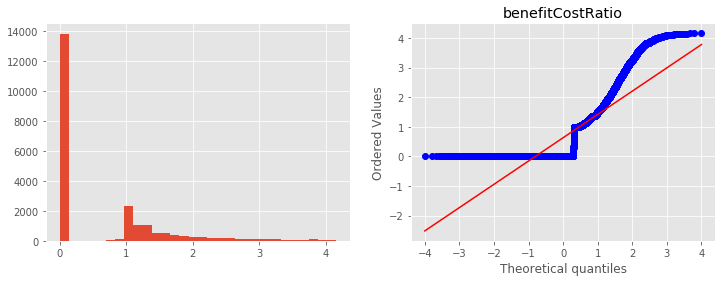

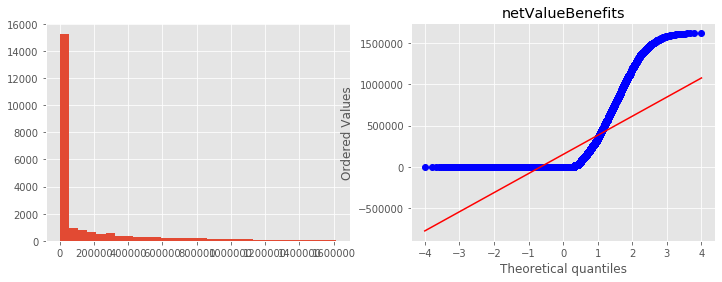

In [61]:
# Function to make vizuals to show normality
def normalityplots (df, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    df[column].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[column], dist = 'norm', plot = plt)
    plt.title('{}'.format(column))
    plt.show()

# Now let's see the results of the outlier removal
for column in df.columns:
    try: 
        normalityplots(df, column)
    except: 
        print(column)

In [62]:
def model_fun(df, target='projectAmount', test_size=0.25):
    X = df.drop([target], axis=1)
    y = df[[target]]    
# Defining training test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=123)
# Defining df with the split data
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1) 
# Getting the categorical columns
    cat_cols = df_train.select_dtypes('category').columns
# Making the model summary
    features = '+'.join(df_train.drop(columns=target).columns)
# Looping through categoricals to make the formula
    for col in cat_cols:
        features = features.replace(col,f'C({col})')   
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
# QQ plot of the residuals for normality
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot of Residuals', fontsize=20)
# Homoscedasticity of Residuals
    ax=axes[1]
    ax.scatter(df_train['projectAmount'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity of Residuals', fontsize=20)
    plt.show();
# Getting the predicted y values from the model
    y_predicted = model.predict(X_test)
    
# Plotting a scatterplot of the training vs original test data prices e
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.projectAmount[:200], 
                        label='Actual Prices')

# Visual titles, labels, and legends of the plots
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Amount')
    plt.legend()
    plt.show();
# Generating the r2 for the test data to compare to the train data 
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
# Displaying everything
    display(model.summary())
    return model

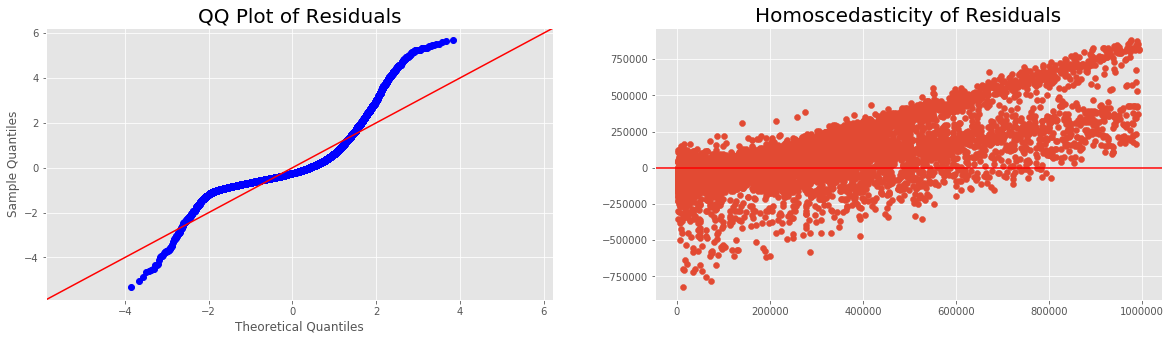

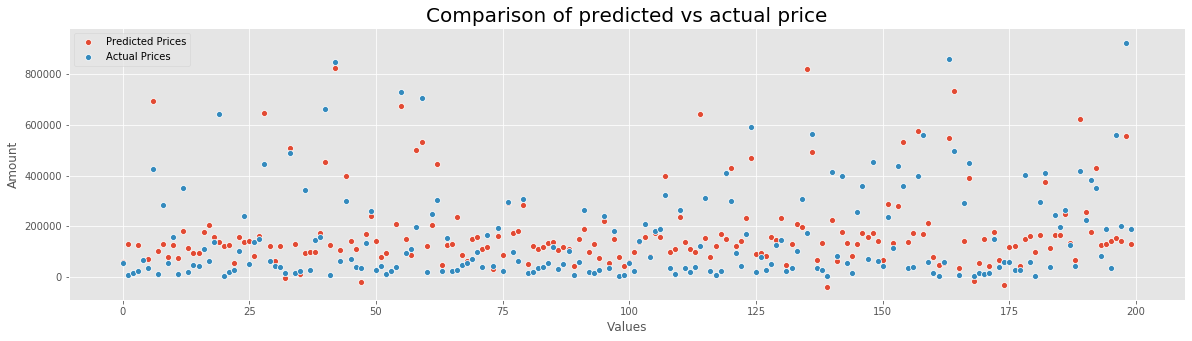

Model test data R2 score: 0.3744829311145139


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     121.5
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:11:16   Log-Likelihood:            -2.2417e+05
No. Observations:               16767   AIC:                         4.485e+05
Df Residuals:                   16670   BIC:                         4.493e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 7.257e+04   1.76e+04      4.132      0.000    3.81e+04    1.07e+05
C(region)[T.2]            4.837e+04   5788.746      8.356      0.000     3.7e+04    5.97e+04
C(region)[T.3]            1.316e+04   5718.578      2.301      0.021    1949.052    2.44e+04
C(region)[T.4]           -1.786e+04   5890.679     -3.032      0.002   -2.94e+04   -6311.401
C(region)[T.5]            1.614e+04   4104.971      3.931      0.000    8091.312    2.42e+04
C(region)[T.6]            8127.3270   4173.554      1.947      0.052     -53.283    1.63e+04
C(region)[T.7]            -306.7310   4199.386     -0.073      0.942   -8537.974    7924.512
C(region)[T.8]           -1.522e+04   5141.551     -2.961      0.003   -2.53e+04   -5143.989
C(region)[T.9]            2.226e+04   1.22e+04      1.823      0.068   -1671.117    4.62e+04
C(region)[T.10]           4783.3289   4737.146      1.010      0.313   -4501.981    1.41e+04
C(stateNumberCode)[T.2]   -897.4924   1.08e+04     -0.083      0.933    -2.2e+04    2.02e+04
C(stateNumberCode)[T.4]  -3.232e+04   1.89e+04     -1.707      0.088   -6.94e+04    4788.424
C(stateNumberCode)[T.5]   1.307e+04   8831.994      1.480      0.139   -4243.648    3.04e+04
C(stateNumberCode)[T.6]  -3387.4518   1.38e+04     -0.246      0.806   -3.04e+04    2.37e+04
C(stateNumberCode)[T.8]    1.88e+04    1.2e+04      1.567      0.117   -4716.470    4.23e+04
C(stateNumberCode)[T.9]   1.975e+04   1.16e+04      1.709      0.087   -2899.806    4.24e+04
C(stateNumberCode)[T.10] -3.872e+04    1.5e+04     -2.589      0.010    -6.8e+04   -9403.112
C(stateNumberCode)[T.11]  -2.67e+04   2.59e+04     -1.029      0.303   -7.75e+04    2.42e+04
C(stateNumberCode)[T.12]   6.24e+04   7346.965      8.493      0.000     4.8e+04    7.68e+04
C(stateNumberCode)[T.13] -1.109e+04   8615.286     -1.287      0.198    -2.8e+04    5796.997
C(stateNumberCode)[T.15]  3.609e+04   2.18e+04      1.652      0.099   -6725.763    7.89e+04
C(stateNumberCode)[T.16] -2.688e+04   1.09e+04     -2.464      0.014   -4.83e+04   -5499.410
C(stateNumberCode)[T.17] -5018.7386   1.04e+04     -0.484      0.628   -2.53e+04    1.53e+04
C(stateNumberCode)[T.18]  5.222e+04    1.2e+04      4.364      0.000    2.88e+04    7.57e+04
C(stateNumberCode)[T.19] -3.413e+04   6267.671     -5.446      0.000   -4.64e+04   -2.18e+04
C(stateNumberCode)[T.20] -3862.2952   8515.154     -0.454      0.650   -2.06e+04    1.28e+04
C(stateNumberCode)[T.21]  3.772e+04   9481.565      3.978      0.000    1.91e+04    5.63e+04
C(stateNumberCode)[T.22]  5.112e+04   7124.323      7.175      0.000    3.72e+04    6.51e+04
C(stateNumberCode)[T.23] -7865.6683   9926.686     -0.792      0.428   -2.73e+04    1.16e+04
C(stateNumberCode)[T.24] -9742.3554   1.05e+04     -0.928      0.354   -3.03e+04    1.08e+04
C(stateNumberC

In [63]:
functionmodel1 = model_fun(df)

# Hypertuning

## Low p-value removal

In [64]:
# Function to identify the insignificant p-values
def bad_pvalues(model, verbose=True):
    
#     Pulling out the p-values and identifying the ones above .05
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    
#     Excluding the intercept in case it has a high p-value
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
        
#      Printing a statement of the bad p-values
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' 
              + f'{bad_features}')
    return bad_features

In [65]:
model2_bad_pvals = bad_pvalues(model1)

55 bad p-values to be reviewed:
region[T.7]             0.669
region[T.10]            0.262
stateNumberCode[T.2]    0.646
stateNumberCode[T.4]    0.066
stateNumberCode[T.5]    0.238
stateNumberCode[T.6]    0.989
stateNumberCode[T.8]    0.149
stateNumberCode[T.11]   0.106
stateNumberCode[T.15]   0.098
stateNumberCode[T.17]   0.409
stateNumberCode[T.20]   0.874
stateNumberCode[T.23]   0.537
stateNumberCode[T.24]   0.703
stateNumberCode[T.27]   0.640
stateNumberCode[T.28]   0.624
stateNumberCode[T.32]   0.770
stateNumberCode[T.33]   0.374
stateNumberCode[T.34]   0.655
stateNumberCode[T.38]   0.426
stateNumberCode[T.47]   0.448
stateNumberCode[T.50]   0.185
stateNumberCode[T.51]   0.148
stateNumberCode[T.53]   0.144
stateNumberCode[T.56]   0.113
stateNumberCode[T.64]   0.722
stateNumberCode[T.66]   0.845
stateNumberCode[T.68]   0.777
stateNumberCode[T.69]   0.522
stateNumberCode[T.70]   0.330
programFy[T.1990]       0.890
programFy[T.1991]       0.054
programFy[T.1992]       0.348
programF

In [66]:
# We can see from the low values that month has many low p-value features
df3 = df2.copy()
df3.drop(columns=(['programFy', 'stateNumberCode']), inplace=True)
df3.shape

(22597, 5)

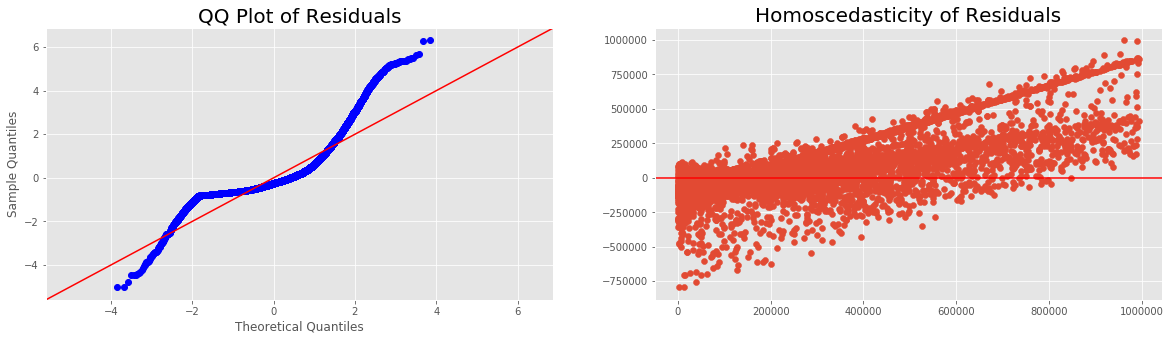

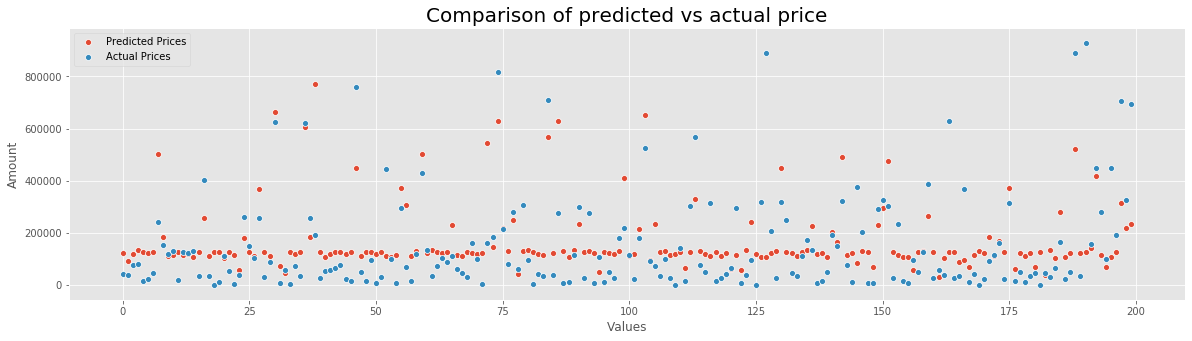

Model test data R2 score: 0.3705369560701016


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1265.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:11:19   Log-Likelihood:            -2.2693e+05
No. Observations:               16947   AIC:                         4.539e+05
Df Residuals:                   16938   BIC:                         4.539e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.192e+05   4734.708     25.170      0.000     1.1e+05    1.28e+05
programArea[T.HMGP]  1.542e+04   4204.383      3.667      0.000    7177.957    2.37e+04
programArea[T.LPDM]  1.104e+05    1.4e+04      7.862      0.000    8.29e+04    1.38e+05
programArea[T.PDM]   5680.4308   5133.847      1.106      0.269   -4382.444    1.57e+04
programArea[T.RFC]   7.291e+04   2.13e+04      3.417      0.001    3.11e+04    1.15e+05
programArea[T.SRL]   1.231e+05   1.46e+04      8.435      0.000    9.45e+04    1.52e+05
region              -1508.2607    499.785     -3.018      0.003   -2487.891    -528.631
benefitCostRatio    -5.875e+04   1696.087    -34.640      0.000   -6.21e+04   -5.54e+04
netValueBenefits        0.4855      0.005     94.275      0.000       0.475       0.496
==============================================================================
Omnibus:                     7059.824   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41577.200
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                       9.644   Cond. No.                     5.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

# Model #2

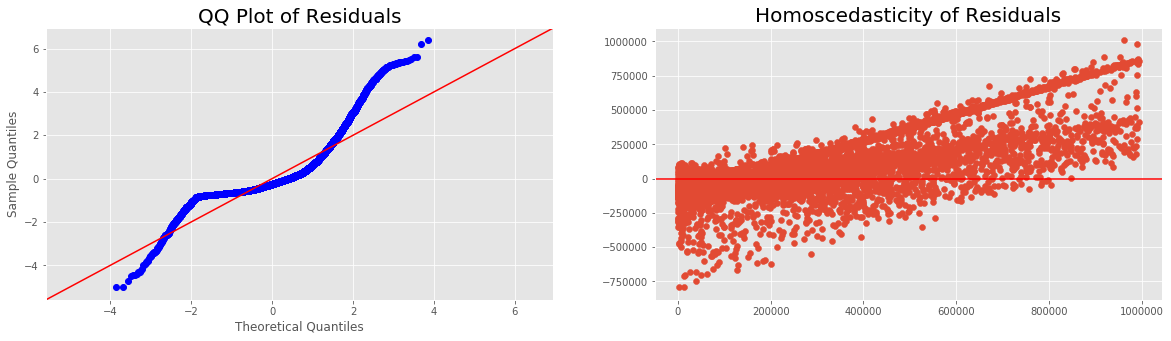

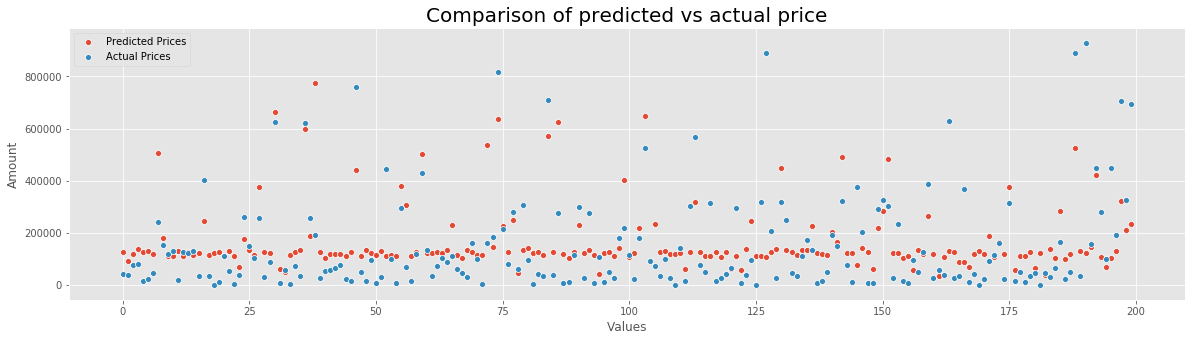

Model test data R2 score: 0.37082798803633765


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1015.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:11:22   Log-Likelihood:            -2.2692e+05
No. Observations:               16947   AIC:                         4.539e+05
Df Residuals:                   16936   BIC:                         4.539e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.165e+06   3.34e+05     -3.490      0.000   -1.82e+06   -5.11e+05
programArea[T.HMGP]  1.479e+04   4205.289      3.516      0.000    6542.673     2.3e+04
programArea[T.LPDM]   1.08e+05    1.4e+04      7.693      0.000    8.05e+04    1.36e+05
programArea[T.PDM]   2057.1172   5205.071      0.395      0.693   -8145.364    1.23e+04
programArea[T.RFC]   7.006e+04   2.13e+04      3.283      0.001    2.82e+04    1.12e+05
programArea[T.SRL]   1.205e+05   1.46e+04      8.251      0.000    9.19e+04    1.49e+05
region              -1346.6549    503.213     -2.676      0.007   -2333.005    -360.305
stateNumberCode       110.4826     72.860      1.516      0.129     -32.331     253.296
programFy             638.2920    166.399      3.836      0.000     312.132     964.452
benefitCostRatio    -5.781e+04   1712.737    -33.751      0.000   -6.12e+04   -5.44e+04
netValueBenefits        0.4840      0.005     93.760      0.000       0.474       0.494
==============================================================================
Omnibus:                     7080.321   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41659.459
Skew:                           1.927   Prob(JB):                         0.00
Kurtosis:                       9.644   Cond. No.                     9.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Model summary to see the changes if significant
functionmodel2 = model_fun(df2)

# Model #3

## Multicolinearity Column/Feature Removal

In [69]:
# Creating a heat map again to see our new data
corr3 = df3.iloc[:,2:] 
corr3.corr().abs().style.background_gradient(cmap='Reds')

,projectAmount,benefitCostRatio,netValueBenefits
projectAmount,1,0.19547,0.569122
benefitCostRatio,0.19547,1,0.628006
netValueBenefits,0.569122,0.628006,1


### Limiting the project Amount to 400,000

In [70]:
df = df[(df['projectAmount']<400000)]

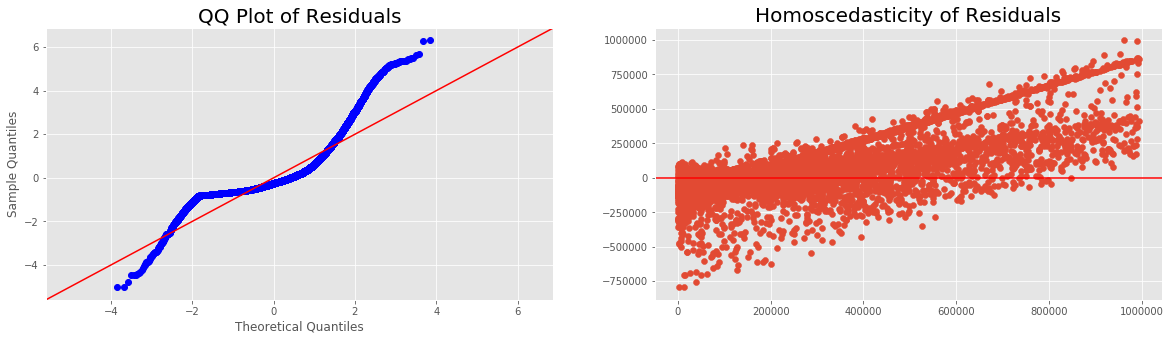

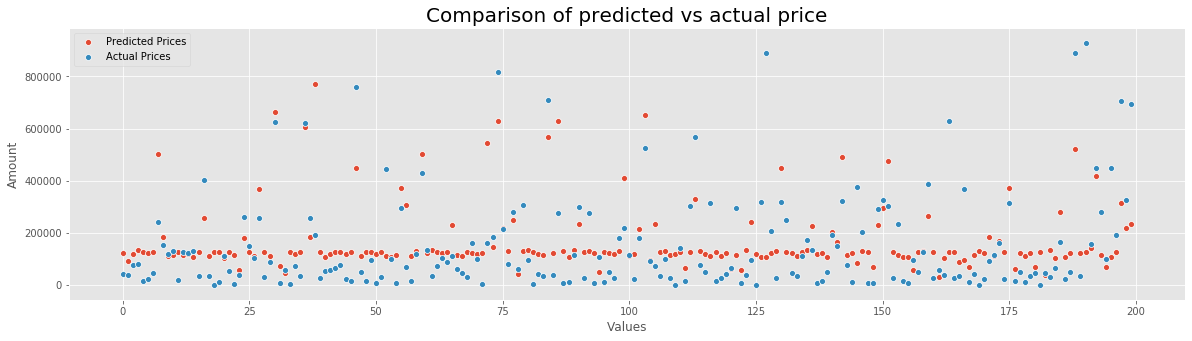

Model test data R2 score: 0.3705369560701016


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1265.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:11:25   Log-Likelihood:            -2.2693e+05
No. Observations:               16947   AIC:                         4.539e+05
Df Residuals:                   16938   BIC:                         4.539e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.192e+05   4734.708     25.170      0.000     1.1e+05    1.28e+05
programArea[T.HMGP]  1.542e+04   4204.383      3.667      0.000    7177.957    2.37e+04
programArea[T.LPDM]  1.104e+05    1.4e+04      7.862      0.000    8.29e+04    1.38e+05
programArea[T.PDM]   5680.4308   5133.847      1.106      0.269   -4382.444    1.57e+04
programArea[T.RFC]   7.291e+04   2.13e+04      3.417      0.001    3.11e+04    1.15e+05
programArea[T.SRL]   1.231e+05   1.46e+04      8.435      0.000    9.45e+04    1.52e+05
region              -1508.2607    499.785     -3.018      0.003   -2487.891    -528.631
benefitCostRatio    -5.875e+04   1696.087    -34.640      0.000   -6.21e+04   -5.54e+04
netValueBenefits        0.4855      0.005     94.275      0.000       0.475       0.496
==============================================================================
Omnibus:                     7059.824   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41577.200
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                       9.644   Cond. No.                     5.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

# Model #4

## Removing more extreme outliers

In [72]:
def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [73]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df3.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df4 = outlierscolumn(df3, num_cols)

0 outliers found in region
2050 outliers found in projectAmount
810 outliers found in benefitCostRatio
3408 outliers found in netValueBenefits


In [74]:
df4.head()

,region,programArea,projectAmount,benefitCostRatio,netValueBenefits,region_outliers,projectAmount_outliers,benefitCostRatio_outliers,netValueBenefits_outliers
1,5,HMGP,366071.000,1.357,961452.000,False,False,False,True
2,7,HMGP,96965.000,0.000,0.000,False,False,False,False
4,7,HMGP,34245.000,0.000,0.000,False,False,False,False
9,8,HMGP,25609.000,0.000,0.000,False,False,False,False
10,2,HMGP,109900.000,0.990,108817.000,False,False,False,False


In [75]:
# Creating a list of the outlier columns
outliercols = []
for col in df4.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'projectAmount_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers']

In [76]:
# Creating a list of the outlier columns
outliercols = []
for col in df4.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'projectAmount_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers']

In [77]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df4 = df4[(df4[col]==False)]
df4.shape

(18011, 9)

In [78]:
# Dropping the outlier columns that were added
for col in outliercols:
    df4.drop(columns=[col], axis=1, inplace=True)

In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18011 entries, 2 to 29627
Data columns (total 5 columns):
region              18011 non-null int64
programArea         18011 non-null object
projectAmount       18011 non-null float64
benefitCostRatio    18011 non-null float64
netValueBenefits    18011 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 844.3+ KB


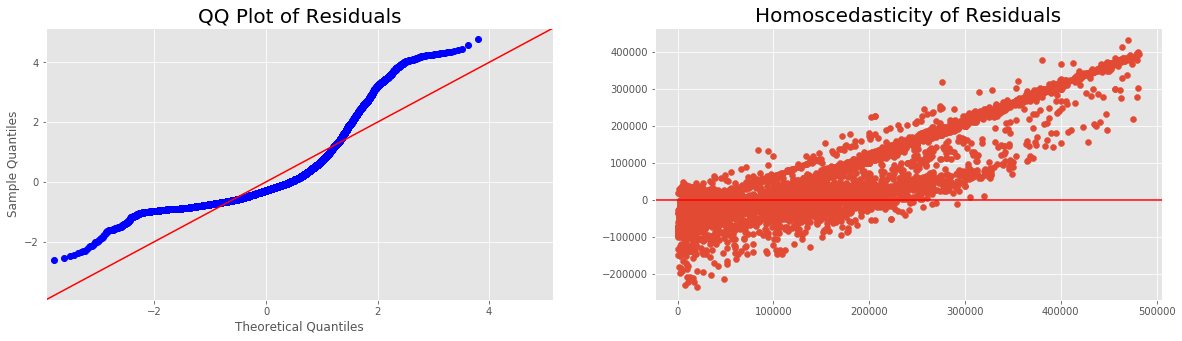

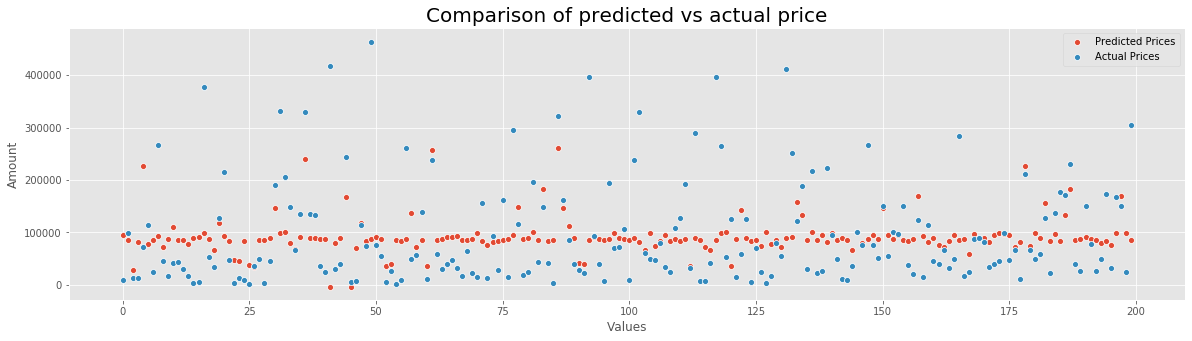

Model test data R2 score: 0.13335679802917322


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          projectAmount   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     272.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:11:29   Log-Likelihood:            -1.7331e+05
No. Observations:               13508   AIC:                         3.466e+05
Df Residuals:                   13499   BIC:                         3.467e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.945e+04   2988.001     26.588      0.000    7.36e+04    8.53e+04
programArea[T.HMGP]  1.254e+04   2638.301      4.754      0.000    7370.113    1.77e+04
programArea[T.LPDM]  5.887e+04   8855.358      6.648      0.000    4.15e+04    7.62e+04
programArea[T.PDM]   2.214e+04   3171.988      6.980      0.000    1.59e+04    2.84e+04
programArea[T.RFC]    7.78e+04   1.42e+04      5.493      0.000       5e+04    1.06e+05
programArea[T.SRL]   6.507e+04   1.01e+04      6.467      0.000    4.53e+04    8.48e+04
region              -1162.2827    317.271     -3.663      0.000   -1784.178    -540.388
benefitCostRatio    -4.689e+04   1738.809    -26.967      0.000   -5.03e+04   -4.35e+04
netValueBenefits        0.6247      0.014     44.332      0.000       0.597       0.652
==============================================================================
Omnibus:                     5018.125   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17033.954
Skew:                           1.914   Prob(JB):                         0.00
Kurtosis:                       6.950   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# Model summary to see the changes if significant
functionmodel4 = model_fun(df4)

**Even though we have signifcantly reduced the size of our dataset we have created a better model to work off of**

In [81]:
functionmodel4.params

Intercept              79446.378
programArea[T.HMGP]    12541.553
programArea[T.LPDM]    58870.254
programArea[T.PDM]     22140.198
programArea[T.RFC]     77803.842
programArea[T.SRL]     65074.633
region                 -1162.283
benefitCostRatio      -46890.857
netValueBenefits           0.625
dtype: float64

**Region is the largest determing factor in program cost while program areas are the least effective to the model**

In [82]:
# Convert the coefficient series to a sorted dataframe

coeffs_df = functionmodel4.params.to_frame()
coeffs_df.columns = ['coefficients']
coeffs_df = coeffs_df.sort_values('coefficients', ascending = False)
coeffs_df.style.background_gradient(cmap = 'Reds').set_caption('Coefficients')

,coefficients
Intercept,79446.4
programArea[T.RFC],77803.8
programArea[T.SRL],65074.6
programArea[T.LPDM],58870.3
programArea[T.PDM],22140.2
programArea[T.HMGP],12541.6
netValueBenefits,0.624653
region,-1162.28
benefitCostRatio,-46890.9


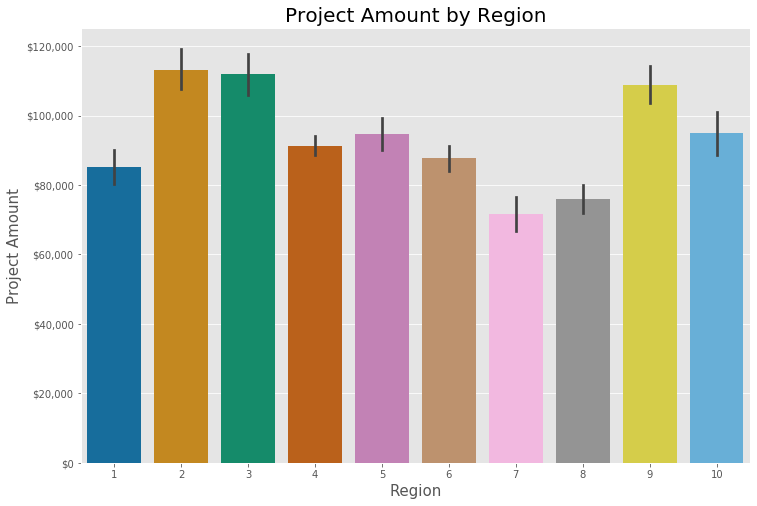

In [83]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='region', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Region', fontsize=20);

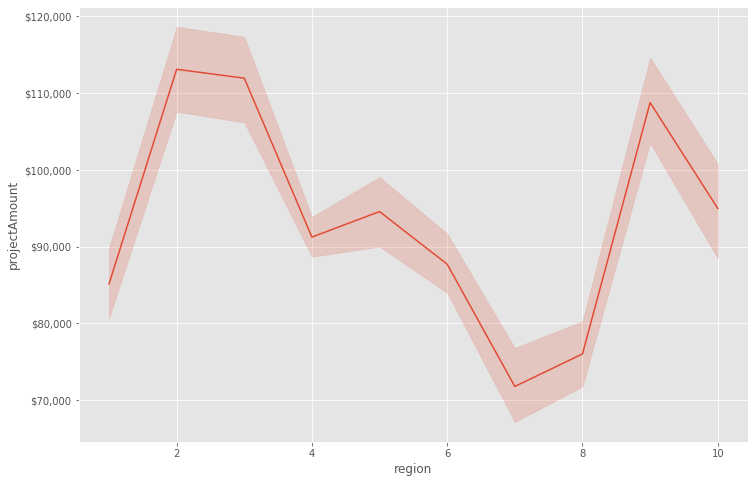

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['region'], df4['projectAmount'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

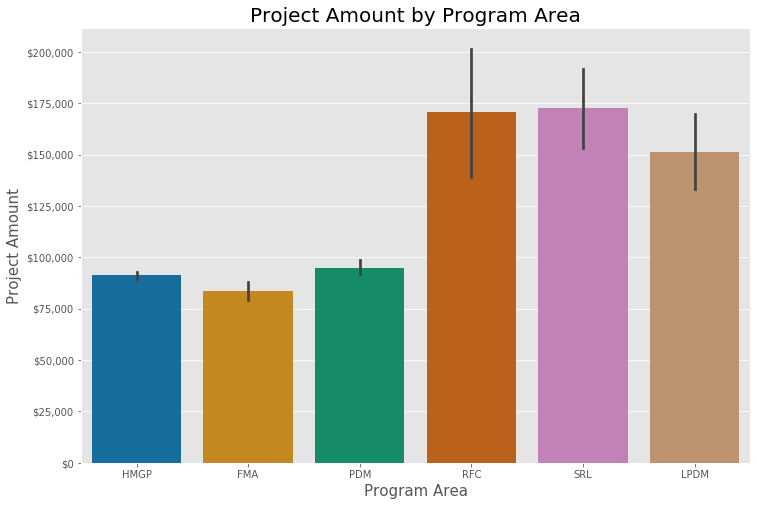

In [85]:
# Vizual to show that program area was the most closely correlated to increase in project amount
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='programArea', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Program Area', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Program Area', fontsize=20);

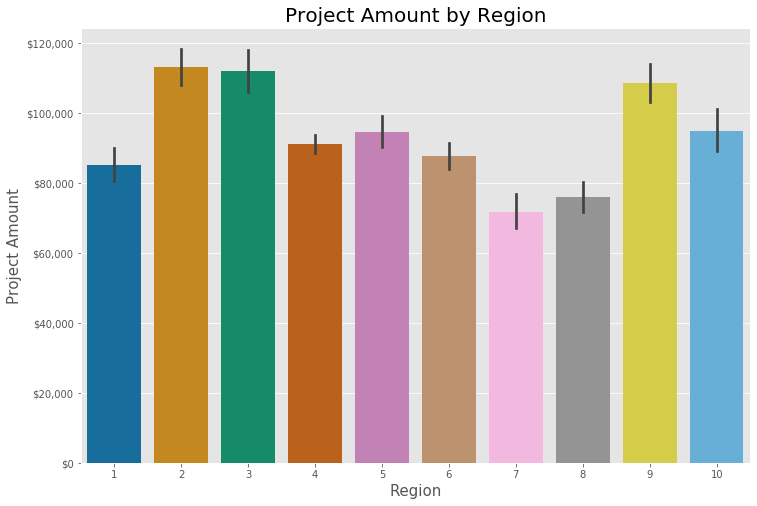

In [86]:
# Vizual to show that program area was the most closely correlated to increase in project amount
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='region', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Region', fontsize=20);

# EDA/Visuals for Presentation

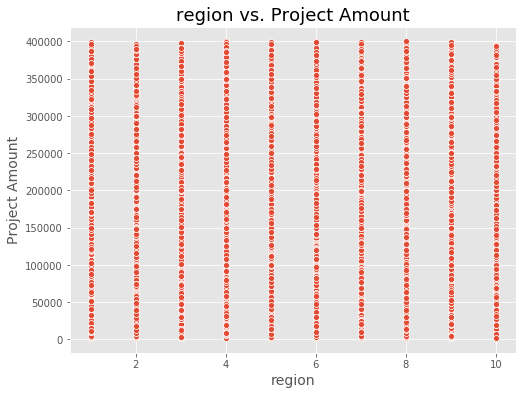

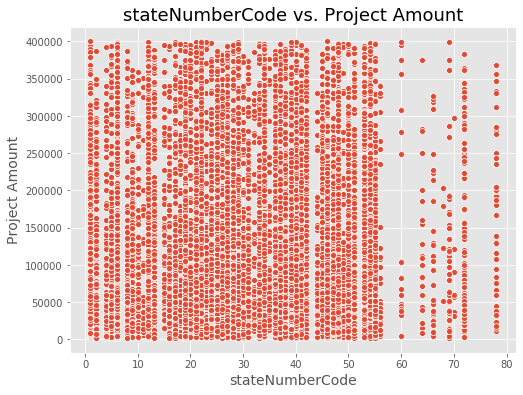

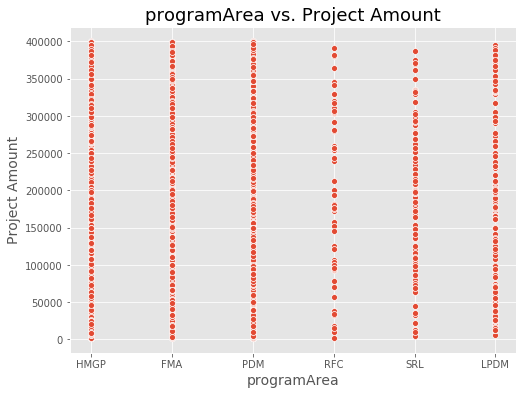

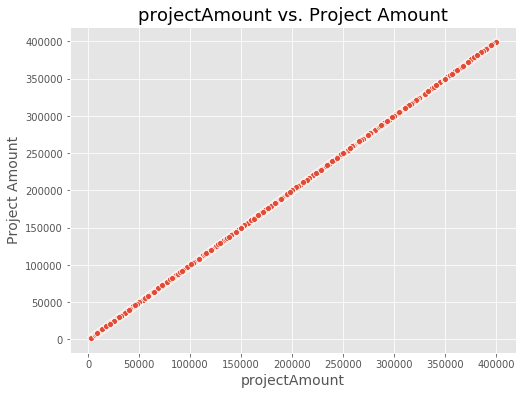

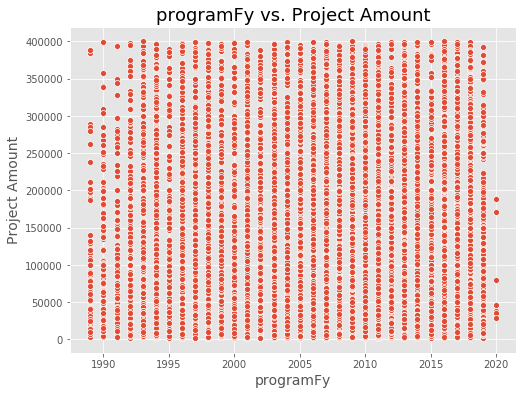

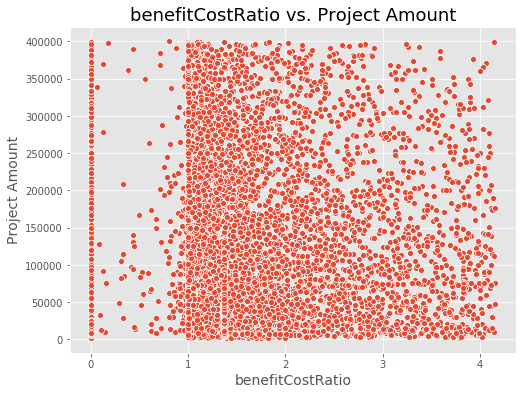

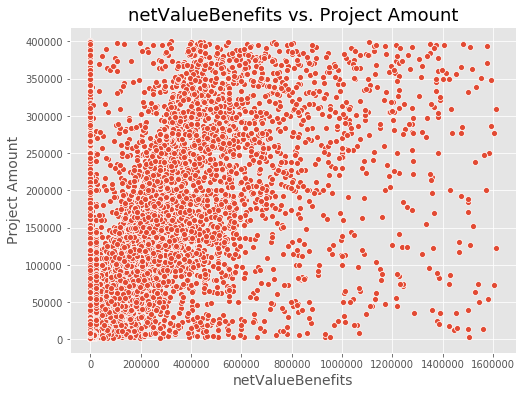

In [87]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [88]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

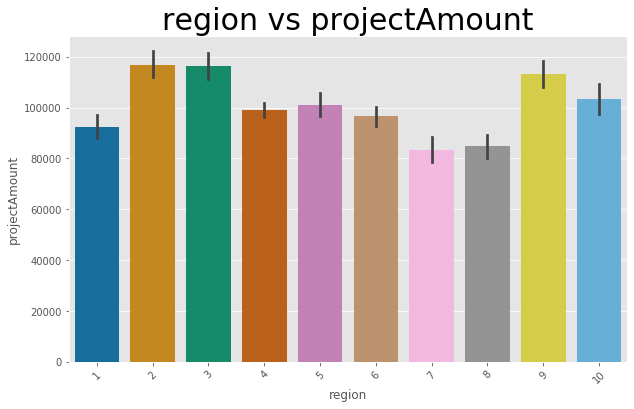

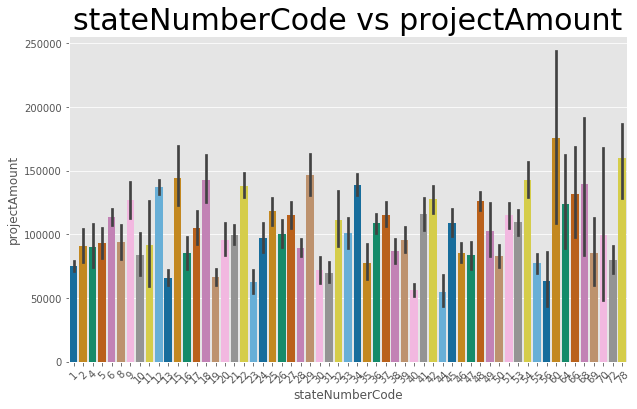

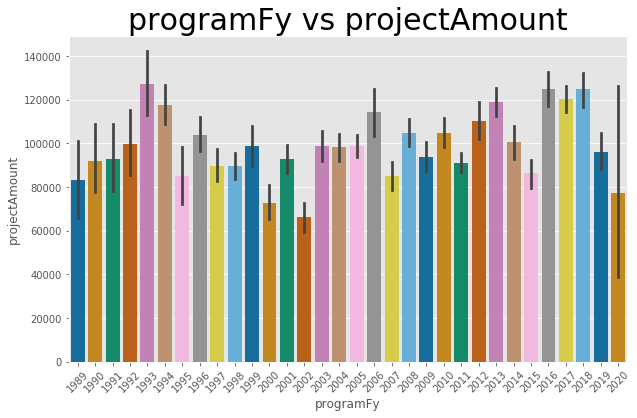

In [89]:
categorical_plots(df)

# Conclusions

- More funds should be allocated to hazard mitigation in all categories as natural disasters and subsequently recovery are increasing

**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
